In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
file2 = 'api-data/yearly_summary/ticker_pct_chg_2020.csv'
ticker2020 = pd.read_csv(file2)
ticker2020.head()

,Ticker,pct change,Industry,Sector,Full Time Emp,Year
0,TRST,-21.068702,Financial Services,Banks-Regional,771.0,2020
1,LNTH,-22.791024,Healthcare,Diagnostics & Research,508.0,2020
2,EPRT,-30.174446,Real Estate,REIT-Diversified,27.0,2020
3,MDC,14.384397,Consumer Cyclical,Residential Construction,1656.0,2020
4,VRA,-22.978177,Consumer Cyclical,Footwear & Accessories,2700.0,2020


In [3]:
ticker_type = ticker2020.loc[ticker2020['Industry'] == 'Basic Materials',:]
ticker_type

,Ticker,pct change,Industry,Sector,Full Time Emp,Year
11,SWM,15.058196,Basic Materials,Paper & Paper Products,3400.0,2020
17,LTHM,43.753736,Basic Materials,Specialty Chemicals,800.0,2020
20,ZEUS,7.836991,Basic Materials,Steel,1551.0,2020
51,TG,-3.299492,Basic Materials,Specialty Chemicals,3000.0,2020
141,GPRE,9.703114,Basic Materials,Specialty Chemicals,820.0,2020
142,TMST,-26.838966,Basic Materials,Steel,2055.0,2020
148,FOE,1.865136,Basic Materials,Specialty Chemicals,5922.0,2020
175,MTRN,8.678103,Basic Materials,Other Industrial Metals & Mining,2600.0,2020
176,KOP,-9.605309,Basic Materials,Specialty Chemicals,2120.0,2020
177,AVD,-15.379864,Basic Materials,Agricultural Inputs,671.0,2020


The r-squared is: 0.011003008151799153


<function matplotlib.pyplot.show>

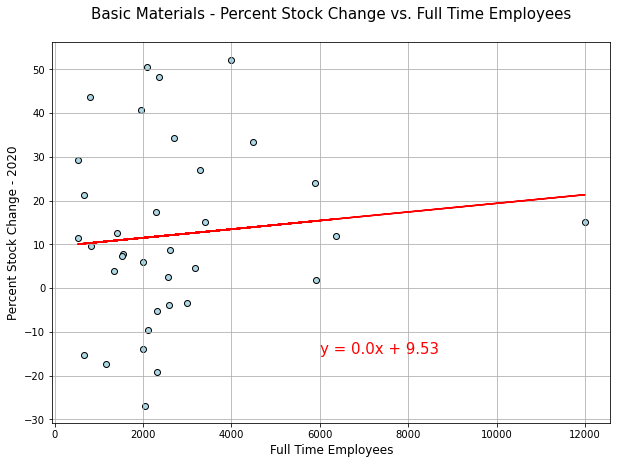

In [14]:
plt.figure(figsize=(10,7))
x_values = ticker_type['Full Time Emp']
y_values = ticker_type['pct change']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6000,-15),fontsize=15,color="red")

plt.title(f'Basic Materials - Percent Stock Change vs. Full Time Employees\n', fontsize = 15)
plt.xlabel('Full Time Employees', fontsize = 12)
plt.ylabel('Percent Stock Change - 2020', fontsize = 12)
#plt.xlim(0,12500)
#plt.ylim(-35,55)
#plt.vlines(0,6000,-15, alpha=0.75, color='red')
plt.grid()
#plt.savefig('images/latvstemp')
print(f"The r-squared is: {rvalue**2}")
plt.show